In [53]:
#USING MACHINE LEARNING : Auto Regressive Moving Average to forecast future temperatures

# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Normals, Stations, Hourly, Monthly
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [66]:
# Set time period
start = datetime(2003, 1, 1)
end = datetime(2023, 12, 31)

# Get hourly data
data = Monthly('72327', start, end)
data = data.fetch()

# Print DataFrame
print(data)

            tavg  tmin  tmax   prcp  wspd    pres  tsun
time                                                   
2003-01-01   0.3  -4.4   5.1   40.0  12.3  1022.8   NaN
2003-02-01   3.3  -0.8   7.4  215.0  11.7  1018.5   NaN
2003-03-01  11.1   4.9  17.4   58.0  11.6  1014.9   0.0
2003-04-01  16.0  10.1  21.9  119.0  13.1  1015.2   NaN
2003-05-01  19.6  14.8  24.4  201.0  12.1  1013.9   NaN
...          ...   ...   ...    ...   ...     ...   ...
2022-09-01  22.7  16.5  29.4   36.4   9.9  1017.3   NaN
2022-10-01  15.7   8.9  23.0   35.2  11.2  1018.8   NaN
2022-11-01  10.9   4.9  17.2  111.3  10.0  1022.0   NaN
2022-12-01   6.7   1.2  11.2  114.3  11.4  1021.4   NaN
2023-01-01   8.6   3.1  13.4  131.2  12.8  1018.6   NaN

[241 rows x 7 columns]


In [67]:
data.to_csv("weather.csv")

In [68]:
data = pd.read_csv("weather.csv")
data

,time,tavg,tmin,tmax,prcp,wspd,pres,tsun
0,2003-01-01,0.3,-4.4,5.1,40.0,12.3,1022.8,NaN
1,2003-02-01,3.3,-0.8,7.4,215.0,11.7,1018.5,NaN
2,2003-03-01,11.1,4.9,17.4,58.0,11.6,1014.9,0.0
3,2003-04-01,16.0,10.1,21.9,119.0,13.1,1015.2,NaN
4,2003-05-01,19.6,14.8,24.4,201.0,12.1,1013.9,NaN
...,...,...,...,...,...,...,...,...
236,2022-09-01,22.7,16.5,29.4,36.4,9.9,1017.3,NaN
237,2022-10-01,15.7,8.9,23.0,35.2,11.2,1018.8,NaN
238,2022-11-01,10.9,4.9,17.2,111.3,10.0,1022.0,NaN
239,2022-12-01,6.7,1.2,11.2,114.3,11.4,1021.4,NaN


In [69]:
data.index = pd.to_datetime(data['time'], format='%Y-%m-%d')

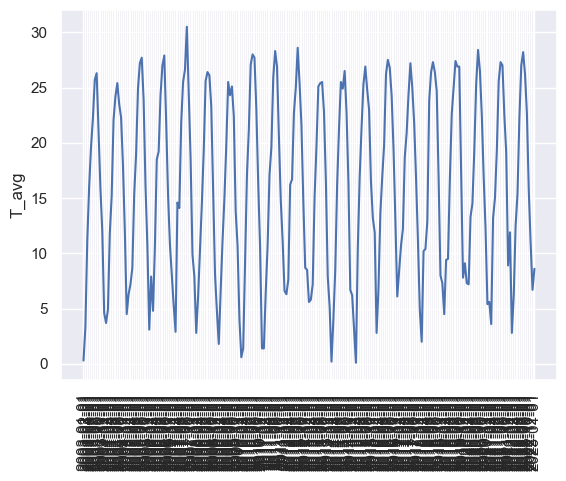

In [70]:
sns.set()
plt.ylabel('T_avg')
plt.xticks(rotation=90)
plt.plot(data['time'],data['tavg'])

In [78]:
train = data[data.index < pd.to_datetime("2013-12-31", format='%Y-%m-%d')]
test = data[data.index > pd.to_datetime("2014-01-01", format='%Y-%m-%d')]

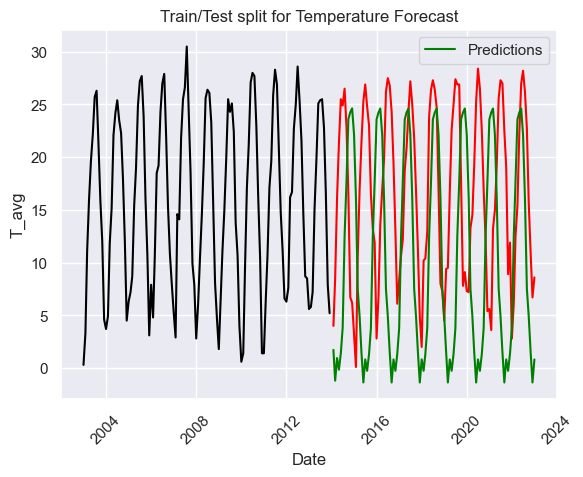

In [80]:
#forecasting
plt.plot(train['tavg'], color = "black")
plt.plot(test['tavg'], color = "red")
plt.ylabel('T_avg')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Temperature Forecast")
y = train['tavg']
ARMAmodel = SARIMAX(y, order = (1, 0, 1),seasonal_order=(0,1,0,15))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()